# Appendix

In [312]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [313]:
import statsmodels.api as sm
import patsy

## Read in the data

In [349]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/lxnrwj5w73bsigranne42td54f54sm', index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [350]:
df["state"].value_counts(normalize=True)

failed        0.553315
successful    0.291683
canceled      0.119232
live          0.024622
suspended     0.011148
Name: state, dtype: float64

## Drop Unnecessary Columns

In [351]:
# drop columns that we don't think will be useful
df["goal"] = df["goal"] * df["static_usd_rate"]
df["isUS"] = df["country"].apply(lambda c: 1 if c == "US" else 0).astype("category")
df["pledge_per_backer"] = df["usd_pledged"] / df["backers_count"]
df = df[df["state"] != "live"]
df = df.drop(
    [
        "id", 
        "photo", 
        "name", 
        "blurb", 
        "pledged", 
        "slug", 
        "state_changed_at",
        "creator",
        "location",
        "profile",
        "urls",
        "source_url",
        "friends",
        "is_starred",
        "is_backing",
        "permissions",
        "name_len",
        "name_len_clean",
        "state_changed_at_weekday",
        "created_at_weekday",
        "state_changed_at_day",
        "state_changed_at_yr",
        "state_changed_at_hr",
        "created_at_weekday",
        "created_at_yr",
        "created_at_hr",
        "create_to_launch",
        "created_at_month",
        "blurb_len_clean",
        "blurb_len",
        "currency_symbol",
        "currency_trailing_code",
        "created_at",
        "create_to_launch_days",
        "staff_pick",
        "spotlight",
        "usd_pledged",
        "state_changed_at_month",
        "created_at_day",
        "launch_to_state_change",
        "launch_to_state_change_days",
        "launched_at",
        "launch_to_deadline",
        "static_usd_rate",
        "country",
        "currency",
        "deadline",
        "state",
        "USorGB",
        "TOPCOUNTRY",
    ], axis=1)

## Investigate average pledge amount per backer

In [352]:
df["pledge_per_backer"].describe()

count    17318.000000
mean       108.380333
std        197.749285
min          0.471178
25%         25.135714
50%         57.142857
75%        116.355251
max       5000.500000
Name: pledge_per_backer, dtype: float64

In [353]:
df.columns

Index(['goal', 'disable_communication', 'backers_count', 'category',
       'deadline_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'launch_to_deadline_days', 'SuccessfulBool', 'LaunchedTuesday',
       'DeadlineWeekend', 'isUS', 'pledge_per_backer'],
      dtype='object')

In [354]:
df["category"] = df["category"].astype("category")

## EDA

In [355]:
df.head()

,goal,disable_communication,backers_count,category,deadline_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,launch_to_deadline_days,SuccessfulBool,LaunchedTuesday,DeadlineWeekend,isUS,pledge_per_backer
0,1500.0000,False,0,Academic,Friday,Wednesday,1,23,2015,10,12,17,2014,13,36,0,0,0,1,NaN
1,500.0000,False,0,Academic,Friday,Monday,5,1,2015,16,3,2,2015,16,60,0,0,0,1,NaN
2,100000.0000,False,5,Academic,Thursday,Sunday,3,26,2015,8,1,25,2015,8,60,0,0,0,1,24.000000
3,5000.0000,False,0,Academic,Monday,Saturday,10,6,2014,0,9,6,2014,0,30,0,0,0,1,NaN
4,3591.2846,False,17,Academic,Monday,Thursday,6,27,2016,12,5,26,2016,5,32,0,0,0,0,23.341317


In [356]:
df.corr()

,goal,disable_communication,backers_count,deadline_month,deadline_day,deadline_yr,deadline_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,launch_to_deadline_days,SuccessfulBool,LaunchedTuesday,DeadlineWeekend,pledge_per_backer
goal,1.000000,-0.003383,0.006229,0.000255,-0.013641,0.002396,0.001606,0.001955,0.003042,0.000516,0.006108,0.045165,-0.033666,-0.000616,-0.007380,0.013624
disable_communication,-0.003383,1.000000,0.004403,-0.003880,0.015332,0.035147,-0.007863,-0.006452,0.015060,0.035762,0.005346,0.010702,-0.070231,0.009506,0.003879,-0.003644
backers_count,0.006229,0.004403,1.000000,0.004340,-0.009020,-0.018983,-0.025546,0.008554,0.007889,-0.020998,-0.049709,0.021530,0.194228,0.028621,-0.006962,0.004482
deadline_month,0.000255,-0.003880,0.004340,1.000000,0.016969,-0.213964,-0.019458,0.532651,0.027054,-0.105063,-0.027702,-0.026715,0.006702,0.022543,-0.020890,0.020873
deadline_day,-0.013641,0.015332,-0.009020,0.016969,1.000000,-0.020803,0.027728,0.005330,0.466635,-0.007766,0.003818,0.017466,-0.011167,0.009743,0.020616,-0.001884
deadline_yr,0.002396,0.035147,-0.018983,-0.213964,-0.020803,1.000000,-0.066913,-0.064808,-0.021100,0.975389,-0.074251,-0.027531,-0.061209,0.031701,-0.007807,0.032757
deadline_hr,0.001606,-0.007863,-0.025546,-0.019458,0.027728,-0.066913,1.000000,-0.011653,0.000224,-0.068664,0.719943,-0.000901,-0.002450,-0.019951,-0.003252,-0.037953
launched_at_month,0.001955,-0.006452,0.008554,0.532651,0.005330,-0.064808,-0.011653,1.000000,-0.027519,-0.167723,-0.019475,0.021204,-0.012870,0.016831,-0.007009,0.022737
launched_at_day,0.003042,0.015060,0.007889,0.027054,0.466635,-0.021100,0.000224,-0.027519,1.000000,-0.019330,0.008779,0.011988,-0.007902,0.000624,0.014610,0.002864
launched_at_yr,0.000516,0.035762,-0.020998,-0.105063,-0.007766,0.975389,-0.068664,-0.167723,-0.019330,1.000000,-0.077259,-0.064978,-0.054547,0.033706,-0.012721,0.031969


## Logistic Regression Model fitting

In [357]:
y, X = patsy.dmatrices("SuccessfulBool ~  goal  + backers_count   + \
        launch_to_deadline_days + isUS", df, return_type="dataframe")
model0 = sm.Logit(y, X).fit()
print(model0.summary())
print(model0.aic)

Optimization terminated successfully.
         Current function value: 0.378532
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         SuccessfulBool   No. Observations:                20124
Model:                          Logit   Df Residuals:                    20119
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.3795
Time:                        21:11:21   Log-Likelihood:                -7617.6
converged:                       True   LL-Null:                       -12277.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3142      0.068     -4.610      0.000      -0.448  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [358]:
y, X = patsy.dmatrices("SuccessfulBool ~  goal  + backers_count   + \
       launch_to_deadline_days + isUS  \
         ", df, return_type="dataframe")
model1 = sm.Logit(y, X).fit()
print(model1.summary())
print(model1.aic)

Optimization terminated successfully.
         Current function value: 0.378532
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         SuccessfulBool   No. Observations:                20124
Model:                          Logit   Df Residuals:                    20119
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.3795
Time:                        21:11:28   Log-Likelihood:                -7617.6
converged:                       True   LL-Null:                       -12277.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3142      0.068     -4.610      0.000      -0.448  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [359]:
y, X = patsy.dmatrices("SuccessfulBool ~  goal + backers_count + isUS", df, return_type="dataframe")
model2 = sm.Logit(y, X).fit()
print(model2.summary())
print(model2.aic)

Optimization terminated successfully.
         Current function value: 0.381138
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         SuccessfulBool   No. Observations:                20124
Model:                          Logit   Df Residuals:                    20120
Method:                           MLE   Df Model:                            3
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.3752
Time:                        21:11:31   Log-Likelihood:                -7670.0
converged:                       True   LL-Null:                       -12277.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8921      0.038    -23.760      0.000      -0.966      -0.819
isUS[T.1]         0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [360]:
y, X = patsy.dmatrices("SuccessfulBool ~ goal  + backers_count", df[df["isUS"] == 1].drop(["isUS"], axis=1), return_type="dataframe")
model3 = sm.Logit(y, X).fit()
print(model3.summary())
print(model3.aic)

Optimization terminated successfully.
         Current function value: 0.380060
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         SuccessfulBool   No. Observations:                13835
Model:                          Logit   Df Residuals:                    13832
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.3902
Time:                        21:11:31   Log-Likelihood:                -5258.1
converged:                       True   LL-Null:                       -8622.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8735      0.029    -29.641      0.000      -0.931      -0.816
goal          -6.15

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [361]:
y, X = patsy.dmatrices("SuccessfulBool ~  goal + backers_count    + \
       launch_to_deadline_days + LaunchedTuesday \
         ", df, return_type="dataframe")
model4 = sm.Logit(y, X).fit(maxiter=1000)
print(model4.summary())
print(model4.aic)

Optimization terminated successfully.
         Current function value: 0.378557
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         SuccessfulBool   No. Observations:                20124
Model:                          Logit   Df Residuals:                    20119
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.3795
Time:                        21:11:32   Log-Likelihood:                -7618.1
converged:                       True   LL-Null:                       -12277.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.2871      0.063     -4.573      0.000      -0.410  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [362]:
y, X = patsy.dmatrices("SuccessfulBool ~  goal  + backers_count   + \
       launch_to_deadline_days + isUS  \
         ", df, return_type="dataframe")
model = sm.Logit(y, X).fit()
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.378532
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         SuccessfulBool   No. Observations:                20124
Model:                          Logit   Df Residuals:                    20119
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.3795
Time:                        21:11:33   Log-Likelihood:                -7617.6
converged:                       True   LL-Null:                       -12277.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3142      0.068     -4.610      0.000      -0.448  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [396]:
y, X = patsy.dmatrices("SuccessfulBool ~  goal    + \
       + backers_count + launch_to_deadline_days + isUS  \
         ", df[(df["backers_count"] < 100) & (df["goal"] < 25000)], return_type="dataframe")
clf = DecisionTreeClassifier(random_state=1234, max_depth=3)
dt_model = clf.fit(X, y)

## Decision Tree

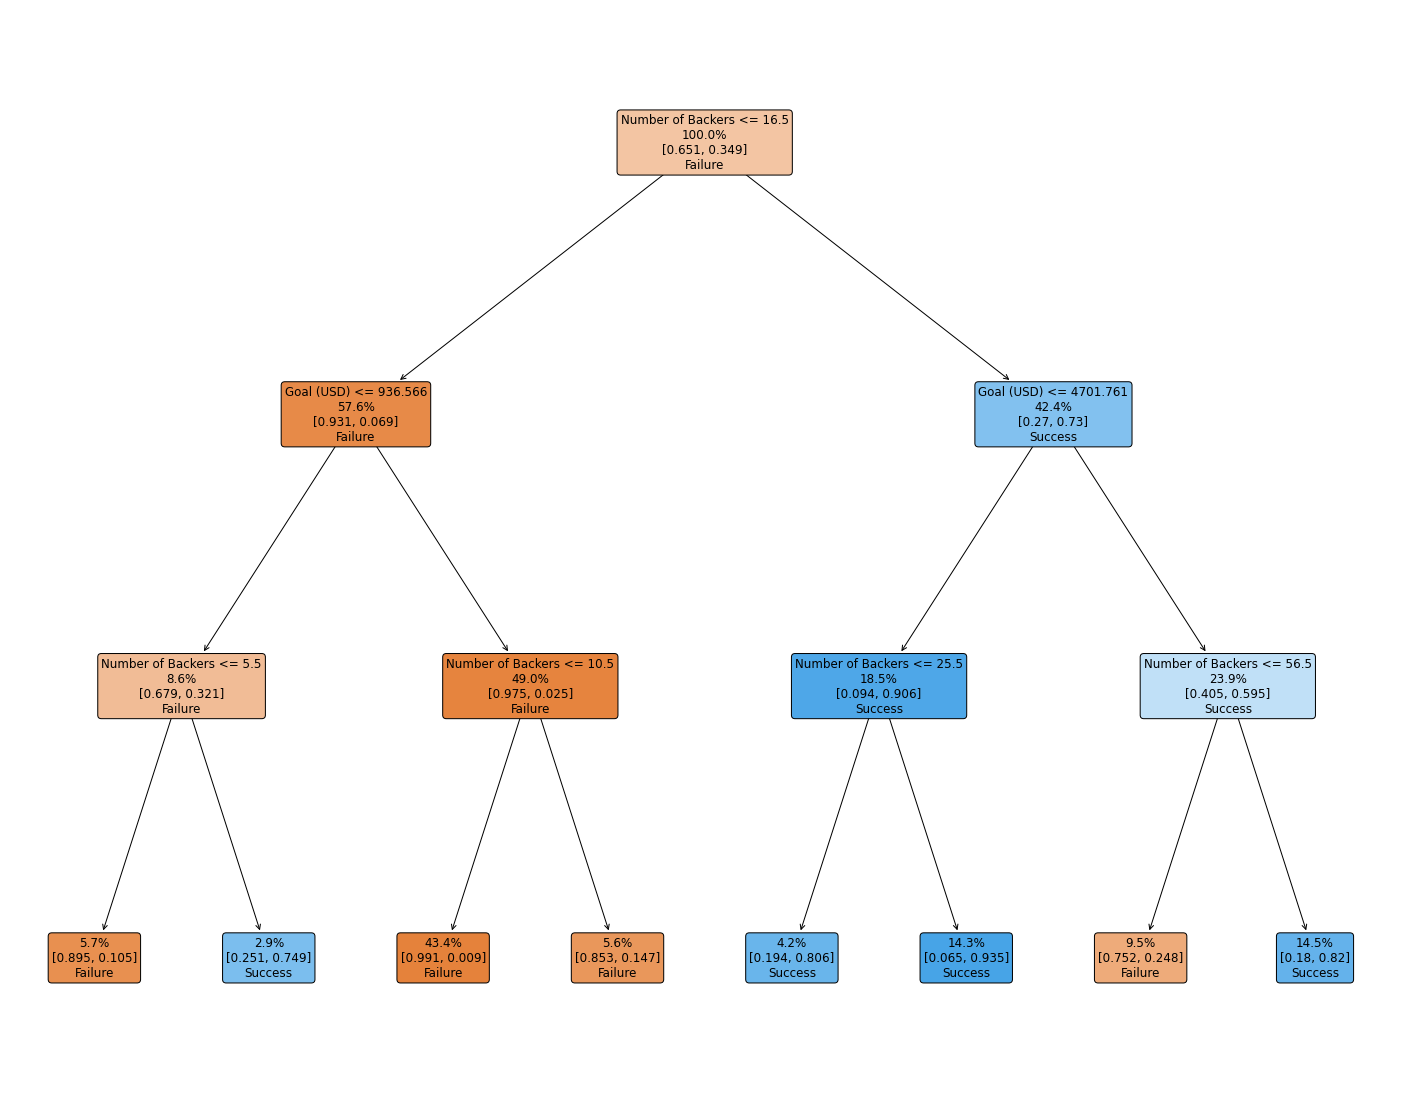

In [388]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=["", "Is USA?", "Goal (USD)", "Number of Backers", "Duration (days)"],  
                   class_names=["Failure", "Success"],
                   label="none",
                   impurity=False,
                   proportion=True,
                   
                   rounded=True,
                   filled=True)

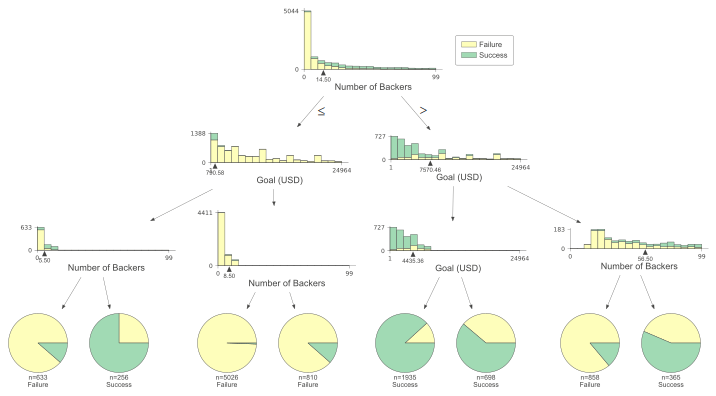

<Figure size 3960x1440 with 0 Axes>

In [402]:
from dtreeviz.trees import dtreeviz # remember to load the package
viz = dtreeviz(clf, X, y["SuccessfulBool"],
                target_name="",
                   feature_names=["", "Is USA?", "Goal (USD)", "Number of Backers", "Duration (days)"],  
                   class_names=["Failure", "Success"],)

viz

In [331]:
model.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         SuccessfulBool   No. Observations:                20124
Model:                          Logit   Df Residuals:                    20119
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.3795
Time:                        19:16:02   Log-Likelihood:                -7617.6
converged:                       True   LL-Null:                       -12277.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3142      0.068     -4.610      0.000      -0.448      -0.181
goal                    -6.237e-05   1.64e-06    -38.111      0.000   -6.56e-05   -5.92e-05
backers_count               0.0161      0.000     47.262      0.000       0.015       0.017
launch_to_deadline_days    -0.0181      0.002    -10.000      0.000      -0.022      -0.015
isUS                        0.0494      0.043      1.145      0.252      -0.035       0.134
===========================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Prediction

In [345]:
model.predict(
    [
        [1, 25000, 50, 7, 1],
        [1, 25000, 100, 14, 1],
        [1, 25000, 200, 30, 1],
        [1, 25000, 300, 60, 1],
        [1, 25000, 1000, 90, 1],
    ]
)

array([0.24093951, 0.38438148, 0.69969011, 0.87087644, 0.99999667])

In [333]:
import math

In [342]:
 math.e ** (-6.237e-05)

0.999937631944968

In [335]:
math.e ** (0.0161)

1.0162303033554483

In [336]:
1 - math.e ** -0.0181

0.017937178834293688

In [340]:
math.e ** 0.0494

1.0506405229091558

In [338]:
df.shape

(20124, 20)

In [248]:
df.columns

Index(['goal', 'disable_communication', 'backers_count', 'category',
       'deadline_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'launch_to_deadline_days', 'SuccessfulBool', 'LaunchedTuesday',
       'DeadlineWeekend', 'isUS', 'pledge_per_backer'],
      dtype='object')

In [270]:
baseline = ["goal", "backers_count", "category", "launch_to_deadline_days", "SuccessfulBool", "isUS"]

In [272]:
df[baseline].describe()

,goal,backers_count,launch_to_deadline_days,SuccessfulBool,isUS
count,2.012400e+04,20124.000000,20124.000000,20124.000000,20124.000000
mean,8.806323e+04,185.865335,34.617472,0.299046,0.312512
std,1.299946e+06,1235.778801,11.836983,0.457851,0.463529
min,7.022768e-01,0.000000,1.000000,0.000000,0.000000
25%,4.000000e+03,2.000000,30.000000,0.000000,0.000000
50%,1.348892e+04,12.000000,30.000000,0.000000,0.000000
75%,4.500000e+04,64.000000,40.000000,1.000000,1.000000
max,1.000000e+08,105857.000000,91.000000,1.000000,1.000000


In [285]:
df["SuccessfulBool"].value_counts()

0    14106
1     6018
Name: SuccessfulBool, dtype: int64

In [288]:
df[df["SuccessfulBool"] == 1]["backers_count"].describe()

count      6018.000000
mean        553.332669
std        2200.792317
min           1.000000
25%          39.000000
50%         105.000000
75%         380.000000
max      105857.000000
Name: backers_count, dtype: float64

In [296]:
df["isUS"].value_counts(normalize=True)

0    0.687488
1    0.312512
Name: isUS, dtype: float64